# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd

In [2]:
db=pd.read_excel('geo.xlsx')

In [3]:
db.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
db_scaled = scaler.fit_transform(db)
db_scaled=pd.DataFrame(db_scaled, columns=db.columns)

C:\Users\volko\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\volko\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [5]:
db_scaled.head()

,x,y,comment_class
0,0.367919,0.159553,-0.378889
1,0.367919,0.159553,-0.378889
2,0.293178,-0.348131,-0.378889
3,-0.073819,-0.539880,-0.378889
4,-0.009022,-0.496273,-0.378889


In [6]:
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN

In [7]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(db_scaled[['x','y']])
    k_inertia.append(clf_kmeans.inertia_)

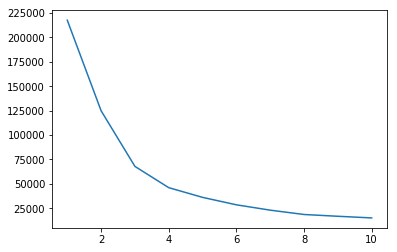

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(ks, k_inertia)

In [9]:
import numpy as np
diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]
k_opt = ks[np.argmin(diff_r)+1]
k_opt

3

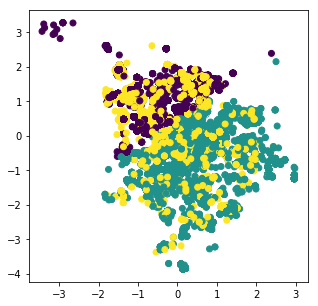

In [10]:
fig, axes = plt.subplots(figsize=(5, 5))
clf_kmeans_opt = KMeans(n_clusters=k_opt)
clusters = clf_kmeans_opt.fit_predict(db_scaled)
axes.scatter(db_scaled['x'],db_scaled['y'],c=clusters)

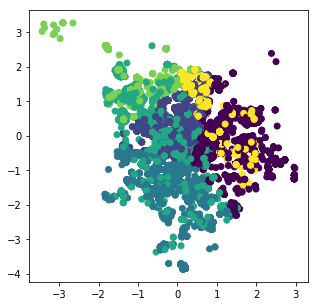

In [11]:
fig, axes = plt.subplots(figsize=(5, 5))
clf_kmeans_opt = KMeans(n_clusters=6)
clusters = clf_kmeans_opt.fit_predict(db_scaled)
axes.scatter(db_scaled['x'],db_scaled['y'],c=clusters)

In [ ]:
from sklearn.metrics import  silhouette_score
res=[]
for k in range(2,6):
    clf_kmeans_opt = KMeans(n_clusters=k)
    clusters = clf_kmeans_opt.fit_predict(db_scaled)
    res.append(silhouette_score(db_scaled, clusters))